### Predict house price given a set of engineered features

Null Hypothesis: Predictor variables have no relationship with target column i.e price

Alternate Hypothesis : Predictor variables have relationship with target column i.e price and we can construct model

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import pprint

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
import statsmodels.api as sm
#Import train_test_split function
from sklearn.model_selection import train_test_split

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Importing DecisionTree and Ensemble technique Classifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import classification_report 

import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans


In [13]:
#dataset without removing skewness and without replacing outliers with median i.e just by removing 5% of outliers
price_df=pd.read_csv('city_withskewness_and_replacingoutliers.csv')
#price_df=pd.read_csv('data_min_outliers_scaled.csv')

#map zipcode to its median house values using below dictionary

zip_to_median={98177: 478600, 98178: 283100, 98052: 465200, 98053: 544500, 98055: 266100, 98056: 342600, 98058: 302200, 98059: 363500, 98188: 226800, 98065: 418900, 98198: 258500, 98199: 606200, 98072: 466100, 98070: 413400, 98074: 556000, 98075: 614100, 98077: 570700, 98092: 287600, 98102: 406000, 98103: 478200, 98105: 613900, 98106: 281700, 98107: 447700, 98108: 326500, 98109: 451400, 98112: 754200, 98115: 492700, 98116: 467900, 98117: 463500, 98118: 350700, 98119: 608300, 98122: 407600, 98039: 1000001, 98125: 372000, 98126: 358100, 98040: 864000, 98001: 268800, 98002: 167100, 98003: 221600, 98004: 723300, 98133: 326400, 98006: 574000, 98005: 568700, 98136: 445700, 98008: 457200, 98010: 319300, 98011: 351000, 98007: 379000, 98014: 410900, 98144: 391000, 98146: 308400, 98019: 376600, 98148: 255900, 98022: 300800, 98023: 265100, 98024: 490600, 98027: 478800, 98028: 386200, 98155: 340900, 98029: 446900, 98031: 271500, 98032: 234700, 98033: 528300, 98034: 364900, 98030: 251700, 98038: 317700, 98166: 386900, 98168: 240000, 98042: 297100, 98045: 368300}

Code:

from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)
zip_list=list(set(price_df.zipcode.tolist()))
dict_temp={}
for z in zip_list:
    zipcode = search.by_zipcode(str(z))
    dict_temp[z]=zipcode.to_dict()['median_home_value']

#### The median house price is the median price point of all the houses/units sold in a particular zipcode. The mdeian price is getting updated on weekly basis by crawling the new data.

#### Hence we are mapping the median house value for each zipcode.

In [14]:
zip_to_median={98177: 478600, 98178: 283100, 98052: 465200, 98053: 544500, 98055: 266100, 98056: 342600, 98058: 302200, 98059: 363500, 98188: 226800, 98065: 418900, 98198: 258500, 98199: 606200, 98072: 466100, 98070: 413400, 98074: 556000, 98075: 614100, 98077: 570700, 98092: 287600, 98102: 406000, 98103: 478200, 98105: 613900, 98106: 281700, 98107: 447700, 98108: 326500, 98109: 451400, 98112: 754200, 98115: 492700, 98116: 467900, 98117: 463500, 98118: 350700, 98119: 608300, 98122: 407600, 98039: 1000001, 98125: 372000, 98126: 358100, 98040: 864000, 98001: 268800, 98002: 167100, 98003: 221600, 98004: 723300, 98133: 326400, 98006: 574000, 98005: 568700, 98136: 445700, 98008: 457200, 98010: 319300, 98011: 351000, 98007: 379000, 98014: 410900, 98144: 391000, 98146: 308400, 98019: 376600, 98148: 255900, 98022: 300800, 98023: 265100, 98024: 490600, 98027: 478800, 98028: 386200, 98155: 340900, 98029: 446900, 98031: 271500, 98032: 234700, 98033: 528300, 98034: 364900, 98030: 251700, 98038: 317700, 98166: 386900, 98168: 240000, 98042: 297100, 98045: 368300}

In [15]:
price_df['median_house_val']=price_df.zipcode.map(zip_to_median)

In [16]:
price_df['class']=price_df['class'].map({'A':4,'B':3,'C':2,'D':1})

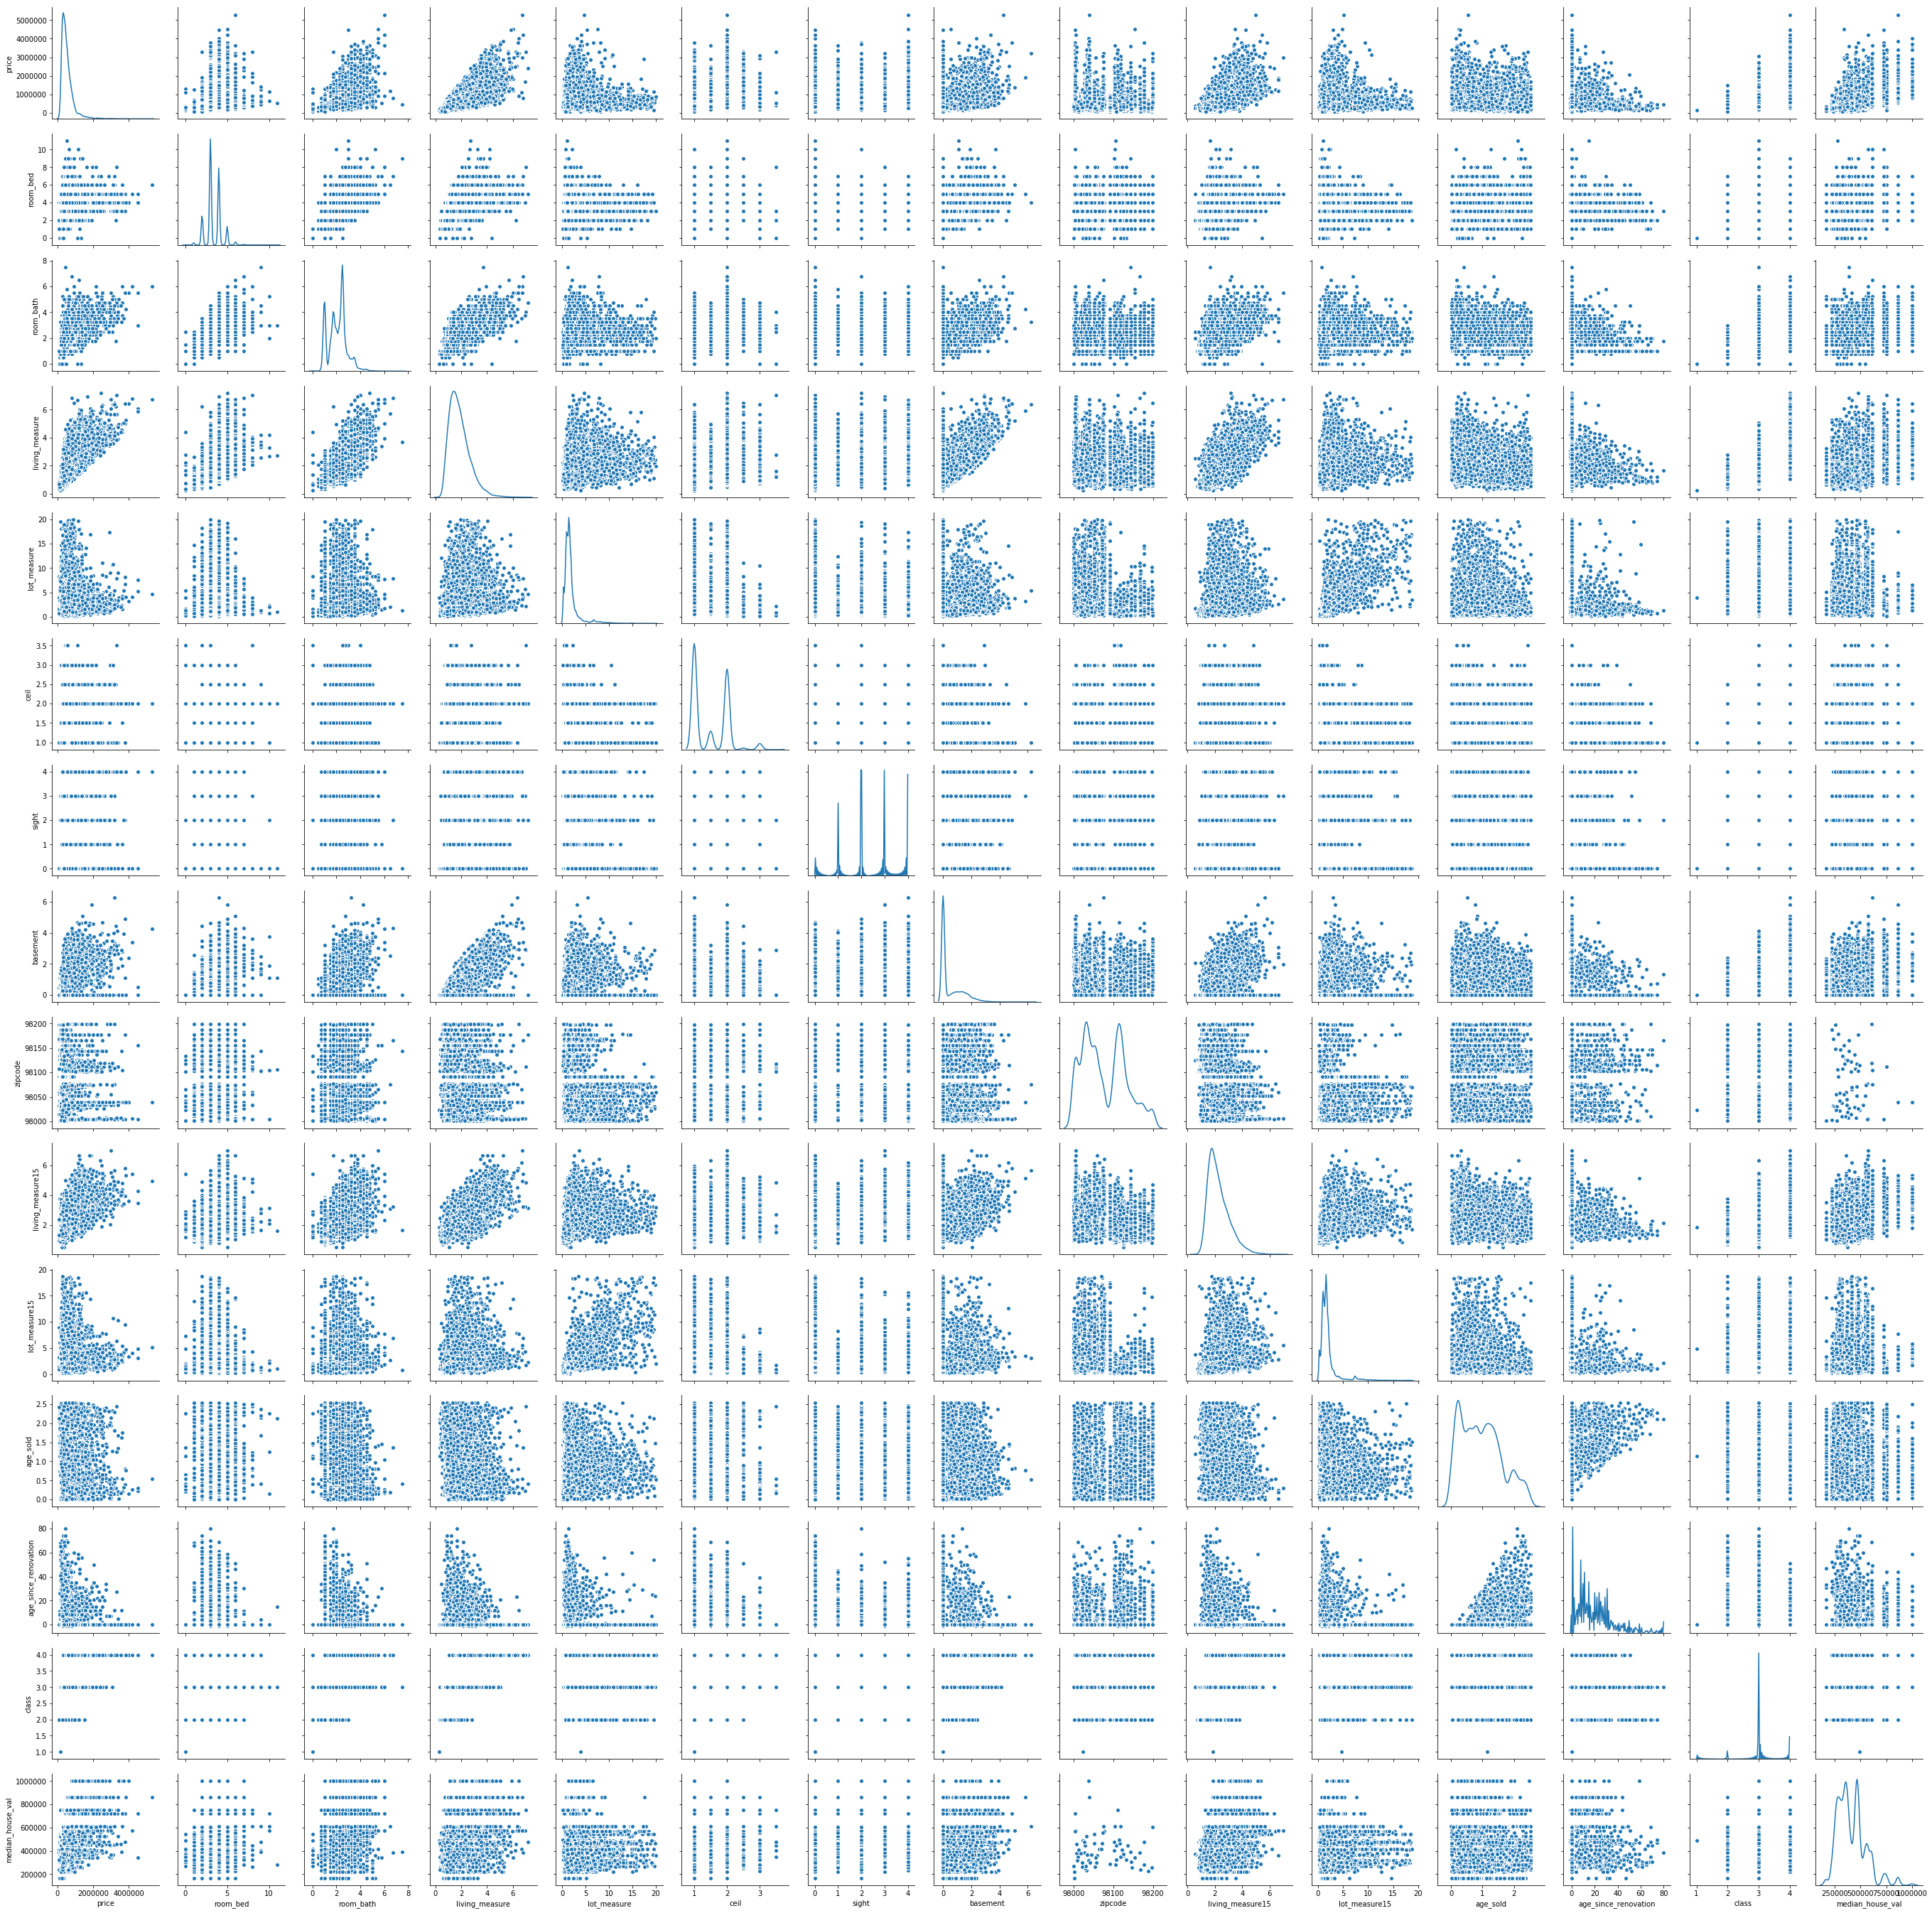

In [17]:
sns.pairplot(price_df,diag_kind='kde')

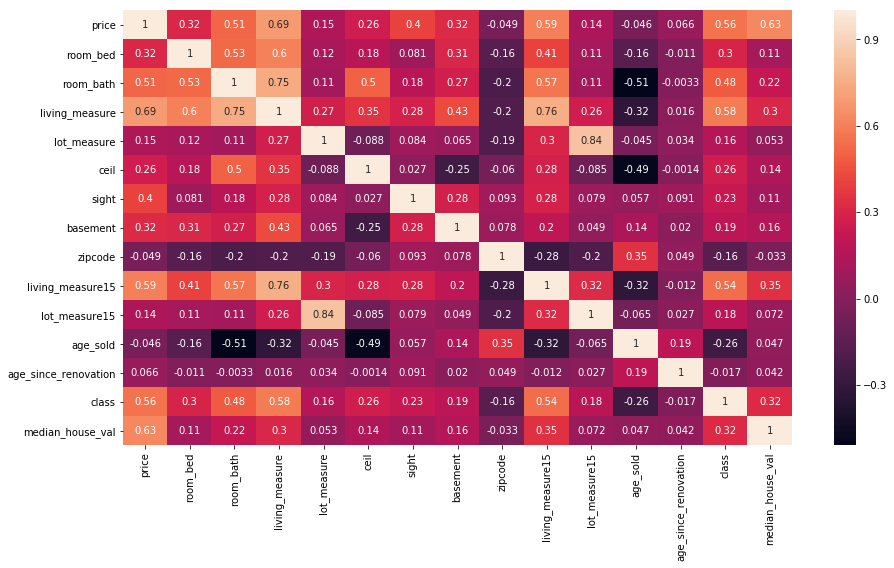

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(price_df.corr(),annot=True)
plt.show()


We see that median price column has good correlation of about 63% with the independent variable.


So considering as important feature, let's proceed with it.

In [18]:
#price_df.drop(columns=['zipcode','ceil','age_since_renovation','room_bed'],inplace=True)
price_df.drop(columns=['zipcode','ceil','major_cities','age_since_renovation'],inplace=True)

From the previos iterations using decision tree we confirmed and checked that ceil and age_since_renovation least important. Hence we proceed wth dropping them

Also we are dropping zipcode and major cities columns as we found a better feature i.e median house value which has high corelation with price.

There are no Categoricals columns now and we are also considering room_bed, room_bath as numerical values.

In [19]:
cat_cols=[]

In [20]:
num_cols=[col for col in price_df.columns if col not in cat_cols]
num_cols.remove('price')

In [21]:
num_cols

['room_bed',
 'room_bath',
 'living_measure',
 'lot_measure',
 'sight',
 'basement',
 'living_measure15',
 'lot_measure15',
 'age_sold',
 'class',
 'median_house_val']

In [22]:
encoded_df=pd.get_dummies(price_df,columns= cat_cols,drop_first=True)

In [23]:
encoded_df.head()

,price,room_bed,room_bath,living_measure,lot_measure,sight,basement,living_measure15,lot_measure15,age_sold,class,median_house_val
0,808100,4,3.25,2.745455,2.555086,0,0.000000,2.436782,1.577156,1.297439,4,326400
1,277500,4,2.50,2.318182,1.424028,0,1.428571,2.597701,1.837544,0.858203,3,265100
2,404000,3,2.50,2.154545,0.821000,0,0.000000,2.724138,0.907914,0.204320,3,317700
3,300000,2,1.00,0.745455,0.729862,0,0.000000,1.747126,0.802673,2.168855,3,326400
4,699000,2,1.50,1.272727,0.768975,0,0.000000,2.183908,1.240342,1.351041,3,492700


In [24]:
#split target and feature set
X=encoded_df.ix[:,1:]
y=encoded_df['price']

C:\Users\cheta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [25]:
X.columns

Index(['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'sight',
       'basement', 'living_measure15', 'lot_measure15', 'age_sold', 'class',
       'median_house_val'],
      dtype='object')

### Splitting the dataset into Training, Test and Validation Set.
#### Train set->70% ,Test->10%, Validation->20% in ratio

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.1)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=42,test_size=0.2)

# Iteration1

### Initiating the LinearRegression model

In [27]:
#let's create basic linear model
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print('The Training Score:', lr.score(X_train,y_train))
print('The Test Score:',lr.score(X_test,y_test))

The Training Score: 0.7424739414350873
The Test Score: 0.752806527246611


In [28]:
for i,col_name in enumerate(X_train.columns):
    #print(i,col_name)
    print("The Coefficient for {} is {}".format(col_name,lr.coef_[i]))

The Coefficient for room_bed is -33536.65114779223
The Coefficient for room_bath is 44534.33788596944
The Coefficient for living_measure is 221580.93895704378
The Coefficient for lot_measure is -26.15217243718399
The Coefficient for sight is 88897.27905044424
The Coefficient for basement is -28145.983993893693
The Coefficient for living_measure15 is 1233.423376898991
The Coefficient for lot_measure15 is -9450.662756600183
The Coefficient for age_sold is 88256.91248466283
The Coefficient for class is 115365.8082848962
The Coefficient for median_house_val is 1.0664462661867262


In [29]:
print('MAE:{}'.format(mean_absolute_error(y_test,pred)))
print('RMSE:{}'.format(mean_squared_error(y_test,pred)))
print('R2_score:{}'.format(r2_score(y_test,pred)))

MAE:109797.4685335788
RMSE:28632081268.970074
R2_score:0.752806527246611


In [30]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     5504.
Date:                Sun, 12 May 2019   Prob (F-statistic):               0.00
Time:                        17:49:08   Log-Likelihood:            -2.8436e+05
No. Observations:               21046   AIC:                         5.687e+05
Df Residuals:                   21034   BIC:                         5.688e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7.091e+05   1.18e+04  

#### We see that the lot_measure and living_measure15 has p value greater than 0.05. Let's try removing it and check the score.

#### Calculating the VIF score for each feature:

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)
#vif.head()

,VIF Factor,features
0,22.5,room_bed
1,24.9,room_bath
2,29.7,living_measure
3,6.3,lot_measure
4,1.3,sight
5,2.1,basement
6,27.1,living_measure15
7,7.1,lot_measure15
8,4.6,age_sold
9,37.1,class


Let's remove Lot_measure and living Measure15 columns and run linear model:

In [32]:
X=X.drop(['living_measure15','lot_measure'],axis=1)

In [33]:
X.columns

Index(['room_bed', 'room_bath', 'living_measure', 'sight', 'basement',
       'lot_measure15', 'age_sold', 'class', 'median_house_val'],
      dtype='object')

After removing living measure15 & lot_measure , let's create  train , test and validation sets.

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.1)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=42,test_size=0.2)

In [35]:
X_train.columns

Index(['room_bed', 'room_bath', 'living_measure', 'sight', 'basement',
       'lot_measure15', 'age_sold', 'class', 'median_house_val'],
      dtype='object')

In [36]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print('The Training Score:', lr.score(X_train,y_train))
print('The Test Score:',lr.score(X_test,y_test))

The Training Score: 0.742471369519375
The Test Score: 0.7528121126662319


In [38]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     6727.
Date:                Sun, 12 May 2019   Prob (F-statistic):               0.00
Time:                        17:51:07   Log-Likelihood:            -2.8436e+05
No. Observations:               21046   AIC:                         5.687e+05
Df Residuals:                   21036   BIC:                         5.688e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7.093e+05   1.18e+04  

On removing the lot_measure and living_measure15 we see the Adjusted R2 value and score remains unchanged and p value is zero for all other features.

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)
#vif.head()

,VIF Factor,features
0,22.5,room_bed
1,24.8,room_bath
2,21.4,living_measure
3,1.3,sight
4,2.0,basement
5,2.3,lot_measure15
6,4.5,age_sold
7,34.0,class
8,12.6,median_house_val


### Since there is multi collinearity between independent features let's try Ridge and Lasso Regression

#### Instantiating Ridge model

In [40]:
#Tunning alpha
ridge_temp=Ridge(random_state=10)

param_grid={
    'alpha' :[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
}

rcv_ridge=RandomizedSearchCV(ridge_temp,param_distributions=param_grid,cv=5)
rcv_ridge.fit(X_train,y_train)
rcv_ridge.best_params_

{'alpha': 20}

In [41]:
rcv_ridge.best_score_

0.7411388928343199

In [43]:
#creating a ridge model on feature set also gives low score
ridgemodel=Ridge(alpha=20)
ridgemodel.fit(X_train,y_train)
print('Train score:')
print(ridgemodel.score(X_train,y_train))
print('Test score:')
print(ridgemodel.score(X_test,y_test))
for i,col_name in enumerate(X_train.columns):
    #print(i,col_name)
    print("The Coefficient for {} is {}".format(col_name,ridgemodel.coef_[i]))

Train score:
0.7424667116926011
Test score:
0.7528059380202075
The Coefficient for room_bed is -33105.57297819243
The Coefficient for room_bath is 44717.31123843168
The Coefficient for living_measure is 221152.25883070624
The Coefficient for sight is 89050.71757207961
The Coefficient for basement is -27828.409548116146
The Coefficient for lot_measure15 is -9317.688686659229
The Coefficient for age_sold is 87390.16363046282
The Coefficient for class is 114776.78607705809
The Coefficient for median_house_val is 1.0693785478278584


#### Instantiating Lasso Model

In [44]:
#Tunning alpha
lasso_temp=Lasso(random_state=10)

param_grid={
    'alpha' :[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
}

rcv_ridge=RandomizedSearchCV(lasso_temp,param_distributions=param_grid,cv=5)
rcv_ridge.fit(X_train,y_train)
rcv_ridge.best_params_

C:\Users\cheta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\cheta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\cheta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\cheta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

{'alpha': 20}

In [45]:
lassomodel=Lasso(alpha=20,normalize=True)
lassomodel.fit(X_train,y_train)
print('Train score:')
print(lassomodel.score(X_train,y_train))
print('Test score:')
print(lassomodel.score(X_test,y_test))
for i,col_name in enumerate(X_train.columns):
    #print(i,col_name)
    print("The Coefficient for {} is {}".format(col_name,lassomodel.coef_[i]))

Train score:
0.7416844638413849
Test score:
0.7530948154804642
The Coefficient for room_bed is -26154.32465974935
The Coefficient for room_bath is 36815.12985536315
The Coefficient for living_measure is 213217.77288128724
The Coefficient for sight is 87265.26597878554
The Coefficient for basement is -19786.64654665144
The Coefficient for lot_measure15 is -7493.93798308194
The Coefficient for age_sold is 76569.9453823709
The Coefficient for class is 113557.6387048992
The Coefficient for median_house_val is 1.065526532304183


As checked above, both lasso and Ridge gives same score and performance as that of Linearregression

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)
#vif.head()

,VIF Factor,features
0,22.5,room_bed
1,24.8,room_bath
2,21.4,living_measure
3,1.3,sight
4,2.0,basement
5,2.3,lot_measure15
6,4.5,age_sold
7,34.0,class
8,12.6,median_house_val


# Iteration2

As we had seen from the pairplot, some of the features and doesn't have linear relationship with price. Let's check the performance of modles by creating polynomial features

#### Lets create polynomial features and check the score

lets create polynomial features from degree 2 -4 and check which is giving better accuracy on linear model.

We opted for polynomial features because the independent features don't have linear relationship with price column

In [44]:
for i in range(2,5):
    #construct polynomial features on numerical columns with degree 2
    poly=PolynomialFeatures(degree=i,interaction_only=True)
    #cat_type_cols=[col for col in X.columns if col not in num_cols]
    X_poly=pd.DataFrame(poly.fit_transform(X))
    #X_poly=pd.concat([X_poly_num,X[cat_type_cols]],axis=1)
    test_size = 0.20 # taking 70:30 training and test set
    seed = 7  # Random numbmer seeding for reapeatability of the 
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=test_size, random_state=seed)    
    poly_model=LinearRegression()
    poly_model.fit(X_train_poly,y_train_poly)
    print('Score for degree as {}:'.format(i))
    print('Train score:')
    print(poly_model.score(X_train_poly,y_train_poly))
    print('Test score:')
    print(poly_model.score(X_test_poly,y_test_poly))

Score for degree as 2:
Train score:
0.7873869334087364
Test score:
0.8092331076289857
Score for degree as 3:
Train score:
0.7984662310392264
Test score:
0.8067153299113561
Score for degree as 4:
Train score:
0.8112646467205031
Test score:
0.7916032103792889


From the above scores we can see that it's better to have degree 3 as it will have better score compared to degree 2 and less polynomial features compared to degree 4

In [47]:
#As we can see that polynomial feature with degree as 3 gives 1%increase in score, let construct polynomial features on numerical columns with degree 3
poly=PolynomialFeatures(degree=3,interaction_only=True)
X_poly=pd.DataFrame(poly.fit_transform(X))
test_size = 0.20 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the 
X_train_poly_3, X_test_poly_3, y_train_poly_3, y_test_poly_3 = train_test_split(X_poly, y, test_size=test_size, random_state=seed) 

In [49]:
lasso_model_poly=Lasso(alpha=2,random_state=2)
lasso_model_poly.fit(X_train_poly_3,y_train_poly_3)
print('Train score:')
print(lasso_model_poly.score(X_train_poly_3,y_train_poly_3))
print('Test score:')
print(lasso_model_poly.score(X_test_poly_3,y_test_poly_3))
lasso_model_poly.coef_

Train score:
0.7961310365768954
Test score:
0.8065683186891128


C:\Users\cheta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([ 0.00000000e+00, -1.33189429e+03, -8.61219342e+04, -6.09104652e+04,
       -1.35455226e+05,  4.74735237e+03,  7.22263399e+04, -1.26796286e+04,
       -2.92762280e+04,  7.29606654e-01,  1.52405803e+04, -8.30569031e+03,
       -1.60399527e+04, -4.06438132e+03, -3.33133957e+02, -1.02986489e+04,
       -8.22902823e+03,  9.02974319e-02, -7.53047879e+03,  1.21042998e+04,
        9.64824181e+03, -1.73878444e+03,  1.04342161e+04,  3.15710292e+04,
       -1.00360677e-02,  3.98238888e+04, -4.85855635e+04, -8.69522855e+03,
       -2.21602778e+04,  2.38745316e+04,  2.02878107e-01,  4.41980138e+04,
       -3.32370121e+04,  3.47381002e+04,  6.39986460e+04, -1.87712188e-02,
       -1.10192537e+04,  6.04020351e+03,  2.02243914e+04,  9.55003673e-02,
       -5.32329609e+04, -3.81388881e+03, -8.54566696e-02, -2.98961841e+03,
        3.31440383e-03, -8.25137852e-02, -3.09245461e+03,  5.68411473e+03,
       -7.60674927e+02,  6.92150534e+02, -7.29576965e+02, -2.66116518e+03,
       -4.62480973e-03, -

In [50]:
ridge_model_poly=Ridge(alpha=0.08,random_state=2)
ridge_model_poly.fit(X_train_poly_3,y_train_poly_3)
print('Train score:')
print(ridge_model_poly.score(X_train_poly_3,y_train_poly_3))
print('Test score:')
print(ridge_model_poly.score(X_test_poly_3,y_test_poly_3))

Train score:
0.7984652030946696
Test score:
0.8067610226048917


C:\Users\cheta\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.1564036850967534e-20 / 1.1102230246251565e-16
  RuntimeWarning)


In [51]:
#Let's check the performance metrics
pred_ridge=ridge_model_poly.predict(X_test_poly_3)
print('MAE:{}'.format(mean_absolute_error(y_test_poly_3,pred_ridge)))
print('RMSE:{}'.format(mean_squared_error(y_test_poly_3,pred_ridge)))
print('R2_score:{}'.format(r2_score(y_test_poly_3,pred_ridge)))

MAE:96706.10446162823
RMSE:25516942805.1608
R2_score:0.8067610226048917


We aimed at attaining a score in the range of 85%-90%. 
As the ploynomial features gives score of 79 to 81. Let's check the score by doing PCA on the raw data

# Iteration3

In [82]:
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

In [104]:
pca_df = pd.read_csv('df_for_pca_new.csv')  

# Split the wine data into separate training (70%) and test (30%) sets and then standardize it to unit variance:

X=pca_df.drop(columns=['price'])



In [105]:
X.head()

,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,living_measure15,lot_measure15,furnished,total_area,age_sold,age_since_renovation,median_house_val
0,4,3.25,2.696429,2.379769,1.0,0,0,5,9,2.960784,0.000000,2.436782,1.514766,1,2.764018,1.302790,0.0,326400
1,4,2.50,2.276786,1.326319,1.0,0,0,3,8,1.715686,1.428571,2.597701,1.764853,0,1.685888,0.861743,0.0,265100
2,3,2.50,2.116071,0.764667,2.0,0,0,3,8,2.323529,0.000000,2.724138,0.871998,0,1.122919,0.205163,0.0,317700
3,2,1.00,0.732143,0.679782,1.0,0,0,4,6,0.803922,0.000000,1.747126,0.770920,0,0.782386,2.177799,0.0,326400
4,2,1.50,1.250000,0.716212,1.0,0,0,4,8,1.372549,0.000000,2.183908,1.191276,0,0.914238,1.356613,0.0,492700


In [107]:
pricedf_array=np.array(X)
cov_matrix = np.cov(pricedf_array.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 8.23943487e-01  3.69864858e-01  4.40023118e-01  2.18002586e-01
   8.88364688e-02 -5.20141536e-04  5.68731663e-02  1.50333735e-02
   3.91052102e-01  3.61266280e-01  2.22025513e-01  2.87866846e-01
   1.50833105e-01  9.61301578e-02  2.89465467e-01 -9.42045758e-02
  -4.27466935e-02  1.35651575e+04]
 [ 3.69864858e-01  5.93027069e-01  4.76428242e-01  4.95490737e-01
   2.08134777e-01  4.25108308e-03  1.10774202e-01 -6.25803760e-02
   6.01879471e-01  4.28388515e-01  1.72577403e-01  3.45068639e-01
   3.67946711e-01  1.48409440e-01  5.59526253e-01 -2.53624464e-01
  -5.05446819e-03  2.29453569e+04]
 [ 4.40023118e-01  4.76428242e-01  6.72225553e-01  1.03867917e+00
   1.56739754e-01  7.37031356e-03  1.78771950e-01 -3.13174023e-02
   7.35189707e-01  5.83419076e-01  2.81794931e-01  4.88723868e-01
   8.23364683e-01  2.06318730e-01  1.11157285e+00 -1.69854222e-01
   7.76797268e-02  3.24877430e+04]
 [ 2.18002586e-01  4.95490737e-01  1.03867917e+00  5.36840947e+01
  -1.96762554e-

In [108]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 7.69658058e-07  3.44160629e-03  3.18014195e-03  9.93137036e-04
  -3.06349804e-01 -3.77966462e-01  6.37221264e-01  1.61092029e-01
   3.55968648e-01  7.73024183e-02  4.04168459e-01  1.77875537e-01
   5.03634211e-02 -2.58877528e-02  1.87333957e-02  5.27671132e-03
   2.97126425e-11  1.11478904e-11]
 [ 1.30187053e-06  7.16331599e-03  2.54862897e-03  4.58275937e-03
  -3.41003290e-01 -2.95807894e-02  1.25606514e-01 -2.62831346e-01
   7.43227393e-02 -4.62997229e-01 -2.56002219e-01 -1.03181625e-01
  -6.29099081e-01 -3.19512205e-01  6.30687450e-02  5.93833015e-04
  -2.45250610e-10 -9.20100901e-11]
 [ 1.84328513e-06  1.46537721e-02 -8.47184667e-05  1.32304973e-02
  -3.91659824e-01 -1.70035194e-01  2.18284222e-02  1.83737897e-02
  -7.85519549e-02  1.03933950e-01 -3.09343159e-01 -3.05545352e-01
   1.40637737e-01  3.22128167e-01 -3.20790601e-02 -4.66468511e-03
  -6.38240939e-01 -2.14976446e-01]
 [-2.72036711e-07  6.61668591e-01  4.66478806e-03 -2.95492904e-01
   4.76488212e-02  

In [109]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(17624914587.433697, array([ 7.69658058e-07,  1.30187053e-06,  1.84328513e-06, -2.72036711e-07,
        5.83575868e-07,  1.61051345e-08,  5.91816605e-07,  1.99956338e-07,
        3.31626864e-06,  1.50361523e-06,  9.47842530e-07,  2.05914481e-06,
        2.70060662e-07,  9.43333291e-07,  8.82666817e-08,  2.19268958e-07,
        1.47142285e-06,  1.00000000e+00])), (120.13186515514317, array([ 3.44160629e-03,  7.16331599e-03,  1.46537721e-02,  6.61668591e-01,
       -5.67990269e-05,  2.07217061e-04,  5.73133901e-03, -5.70670887e-04,
        1.40072528e-02,  1.52456294e-02,  1.53871917e-03,  1.21622111e-02,
        4.04716301e-01,  4.90679627e-03,  6.30401793e-01, -3.78370445e-03,
        8.03412038e-03, -1.38675187e-07])), (23.95861983122566, array([ 3.18014195e-03,  2.54862897e-03, -8.47184667e-05,  4.66478806e-03,
        1.21412089e-03, -1.82905427e-03, -1.35585107e-02,  7.88539438e-04,
        1.06948849e-02,  1.51517322e-03, -2.92921673e-03,  4.71698702e-03,
        4.63294579e-03, 

In [110]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%




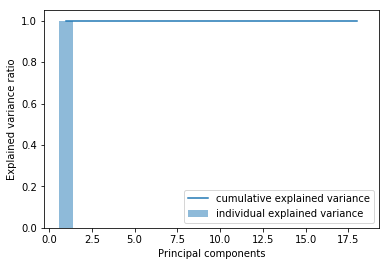

In [111]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.figure(figsize=(10,8))
plt.show()

In [112]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0])   # Reducing from 18 to 1 dimension space

X_std_4D = np.dot(pricedf_array,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

In [113]:
Proj_data_df.shape

(21600, 1)

In [114]:
from sklearn import model_selection


X_train_pca, X_test_pca, y_train_pca, y_test_pca = model_selection.train_test_split(Proj_data_df, pca_df[['price']], test_size=0.2, random_state=7)
# Let us build a linear regression model on the PCA dimensions 

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train_pca, y_train_pca)

regression_model.score(X_test_pca, y_test_pca)

0.38740723900386065

As checked, PCA doesn't gives good score. Let's go for complex tree based models

# Iteration4 

#### Using Decision Tree Regressor

In [115]:
model_dec=DecisionTreeRegressor(random_state=1)
model_dec.fit(X_train,y_train)
model_dec.predict(X_test)
print("The accuracy of train set:", model_dec.score(X_train,y_train))
print("The accuracy of test set:",model_dec.score(X_test,y_test))

The accuracy of train set: 0.9999999989010302
The accuracy of test set: 0.6989706108082994


 #### We can see from above score that its overfitting case as we haven't regulairsed the tree. Let's regularize the tree.

#### Using best parameters

As mentioned earlier we are using same set where we have dropped living_measure15 and lot_measure and we are proceeding with the same as it is not showing any importance.

In [117]:
dtree1=DecisionTreeRegressor(random_state=42)
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": range(1,200),
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

CV_rfc = RandomizedSearchCV(estimator=dtree1, param_distributions=param_grid, cv= 6)
CV_rfc.fit(X_val, y_val)

print("Best Parameters:")
print(CV_rfc.best_params_)

Best Parameters:
{'min_samples_split': 20, 'min_samples_leaf': 20, 'max_leaf_nodes': 100, 'max_depth': 8, 'criterion': 'mse'}


In [118]:
CV_rfc.best_score_

0.7232231304394999

In [53]:
#lets create a descision tree model with tunned parameters
decision_tree=DecisionTreeRegressor(criterion='mse',max_depth=8,max_leaf_nodes=100,min_samples_leaf=20,min_samples_split=20,random_state=42)

decision_tree.fit(X_train,y_train)
print(decision_tree.score(X_train,y_train))
print(decision_tree.score(X_test,y_test))


0.8103448775043893
0.7698907505605149


### We can see the features that we have created('class','median_house_val') are top important features.

In [121]:
f_importance_df=pd.DataFrame({'column': X_train.columns,'importance':dtree.feature_importances_})
f_importance_df.sort_values(by=['importance'],ascending=False)

,column,importance
7,class,0.443540
8,median_house_val,0.260273
2,living_measure,0.221419
3,sight,0.043342
6,age_sold,0.022707
4,basement,0.003664
5,lot_measure15,0.002832
0,room_bed,0.001128
1,room_bath,0.001094


#### Using Random Forest Regressor:

#### Using Randomsearch CV let's find out best parameters for RandomForestRegressor

In [122]:
# Tunning parameters for RandomforestRegressor on validation set
RF_model=RandomForestRegressor(random_state=10)

param_grid = { 
    'n_estimators': [125,150,175,200,225,250,275,300,325,350,375,400,425],
    'max_depth' : range(2,20),
    'max_features':['auto','sqrt','log2'],
    "min_samples_leaf": range(1,11),
    "max_leaf_nodes": range(2,20)
}

CV_rfc = RandomizedSearchCV(estimator=RF_model, param_distributions=param_grid, cv= 5)
CV_rfc.fit(X_val, y_val)

print("Best Parameters:")
print(CV_rfc.best_params_)


Best Parameters:
{'n_estimators': 250, 'min_samples_leaf': 4, 'max_leaf_nodes': 19, 'max_features': 'log2', 'max_depth': 10}


In [123]:
CV_rfc.best_score_

0.7463900153574081

In [54]:
# Let's create new generalized model for RandomForestRegressor with tunned parameters
model_RF=RandomForestRegressor(n_estimators=250,random_state=10,max_depth=10,min_samples_leaf=4,
                               min_samples_split=2,max_features='log2',bootstrap=False)
model_RF.fit(X_train,y_train)
print('Training Score',model_RF.score(X_train,y_train))
print('Test Score',model_RF.score(X_test,y_test))

Training Score 0.9014368407732309
Test Score 0.826081565418876


With hypertuning the parameters, We get a score of 82% in Test Score.

Let's go for  GradientBoostingRegressor to check whether we are able to attain the aimed score or not

#### Using Gradient Boost Regressor:

#### Using RandomSearchCV to get the best parameters for GradientBoostingRegressor model

In [138]:
#performing Random CV and find out best parameters for GradientBoostingRegressor
gdb_reg=GradientBoostingRegressor(random_state=42)

param_grid = { 
    'learning_rate':[0.15,0.1,0.05,0.01,0.001],
    'loss':['ls', 'huber'],
    'n_estimators':[125,150,175,157,200,225,250,275,300,325,350,375,400,425],
    'max_depth' : range(2,10),
    "max_leaf_nodes": range(2,20),
    'min_samples_split':range(2,10)   
    
}

CV_gdb_reg = RandomizedSearchCV(estimator=gdb_reg,param_distributions=param_grid, cv= 5)
CV_gdb_reg.fit(X_val, y_val)

print("Best Parameters:")
print(CV_gdb_reg.best_params_)
print(CV_gdb_reg.best_score_)


Best Parameters:
{'n_estimators': 300, 'min_samples_split': 8, 'max_leaf_nodes': 10, 'max_depth': 8, 'loss': 'ls', 'learning_rate': 0.1}
0.8459514455214086


In [55]:
gradientboosting_model=GradientBoostingRegressor(random_state=42,n_estimators=300,max_depth=8,learning_rate=0.1,min_samples_split=8,max_leaf_nodes=10,loss='ls')
#gdb_reg=GradientBoostingRegressor(random_state=42,n_estimators=400,max_depth=5,learning_rate=0.1,min_samples_split=2,loss='ls')
gradientboosting_model.fit(X_train,y_train)
print('Train score:')
print(gradientboosting_model.score(X_train,y_train))
print('Test score:')
print(gradientboosting_model.score(X_test,y_test))

Train score:
0.9226480252955812
Test score:
0.8620424236062741


We able to achieve  86% score in Test set.  With both the scores let's further pass the GradientBoosting model into Bagging Regressor to reduce overfitting and to make model more generalized

#### So we are considering the above tunned Gradient Regressor as our base estimator.

#### Using Bagging Technique(With Gradient Boosting Regressor as base estimator)

In [140]:
bgr=BaggingRegressor(base_estimator=gdb_reg,random_state=5)
bgr.fit(X_train,y_train)
print('Train score:')
print(bgr.score(X_train,y_train))
print('Test score:')
print(bgr.score(X_test,y_test))

Train score:
0.9149002895967502
Test score:
0.8622585449837192


With both scores, we see test score around 86% .Let's further tune the parameters of bagging regressor

In [57]:
baggingregressor_model=BaggingRegressor(base_estimator=gradientboosting_model,random_state=5,n_estimators=9,bootstrap=False,max_samples=0.6)
baggingregressor_model.fit(X_train,y_train)
print('Train score:')
print(baggingregressor_model.score(X_train,y_train))
print('Test score:')
print(baggingregressor_model.score(X_test,y_test))
#print('Validation Score:',bgr.score(X_val,y_val))

Train score:
0.9120402599175423
Test score:
0.8700070927799807


In [145]:
X_train.columns

Index(['room_bed', 'room_bath', 'living_measure', 'sight', 'basement',
       'lot_measure15', 'age_sold', 'class', 'median_house_val'],
      dtype='object')

#### Finally we get training score of 91% and Test score of 87% using Bagging Regressor with Gradient Boosting as base model estimator with the above features.
#### By condering the varied data which we have  along with features not haveing good corelation with price, we did feature engineering, we got strong predictors and were finally able to achieve the score in the aimed range  of 85%-90%

#### Serializing the model using pickle from  scikit learn library

In [146]:
from sklearn.externals import joblib

filename ='finalized_model.pkl'
#dump model as pickle file with columns
#cols=list(X_train.columns)
#model_name=bgr2

joblib.dump(bgr2,filename)


['finalized_model.pkl']

In [148]:
# load the model from disk

loaded_model = joblib.load('finalized_model.pkl')
result = loaded_model.predict(X_test)
print('Result Score:',result)


Result Score: [ 325505.95343466 1602883.91509748  695417.9285183  ...  547977.60507204
  692284.37988211  241184.32652673]


In [149]:
#Let's check the  metrics for our model
#Let's check the performance metrics

print('MAE:{}'.format(mean_absolute_error(y_test,result)))
print('RMSE:{}'.format(mean_squared_error(y_test,result)))
print('R2_score:{}'.format(r2_score(y_test,result)))

MAE:76426.5886261361
RMSE:15056900339.866493
R2_score:0.8700070927799807


#### By moving on to more complex model with the new feature set, we have reduced the RMSE and MAE a lot and increased the value for Adjusted R2

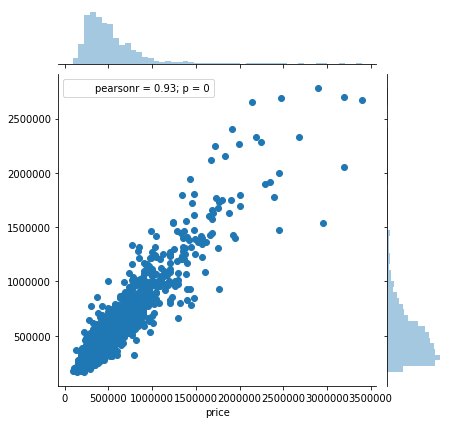

In [160]:
### Let's plot actual result with predicted result and see how the result varies

sns.jointplot(y_test,result)


### Let's visualize each model performance

In [85]:
model_names=['linear_regression','Ride_model','Lasso_model','Lasso_model_poly','Ridge_model_poly','Decision_tree','Random_forest','Gradient_Boosting_Regressor','Bagging_Regressor']

In [86]:
a=lr.score(X_test,y_test)
b=ridgemodel.score(X_test,y_test)
c=lassomodel.score(X_test,y_test)
d=lasso_model_poly.score(X_test_poly_3,y_test_poly_3)
e=ridge_model_poly.score(X_test_poly_3,y_test_poly_3)
f=decision_tree.score(X_test,y_test)
g=model_RF.score(X_test,y_test)
h=gradientboosting_model.score(X_test,y_test)
i=baggingregressor_model.score(X_test,y_test)


In [87]:
score_list=[a,b,c,d,e,f,g,h,i]
score_list=[round(a*100,3)for a in score_list]

In [88]:
score_list

[75.281, 75.281, 75.309, 80.657, 80.676, 76.989, 82.608, 86.204, 87.001]

In [89]:
score_df=pd.DataFrame({'model_names':model_names,'scores':score_list})

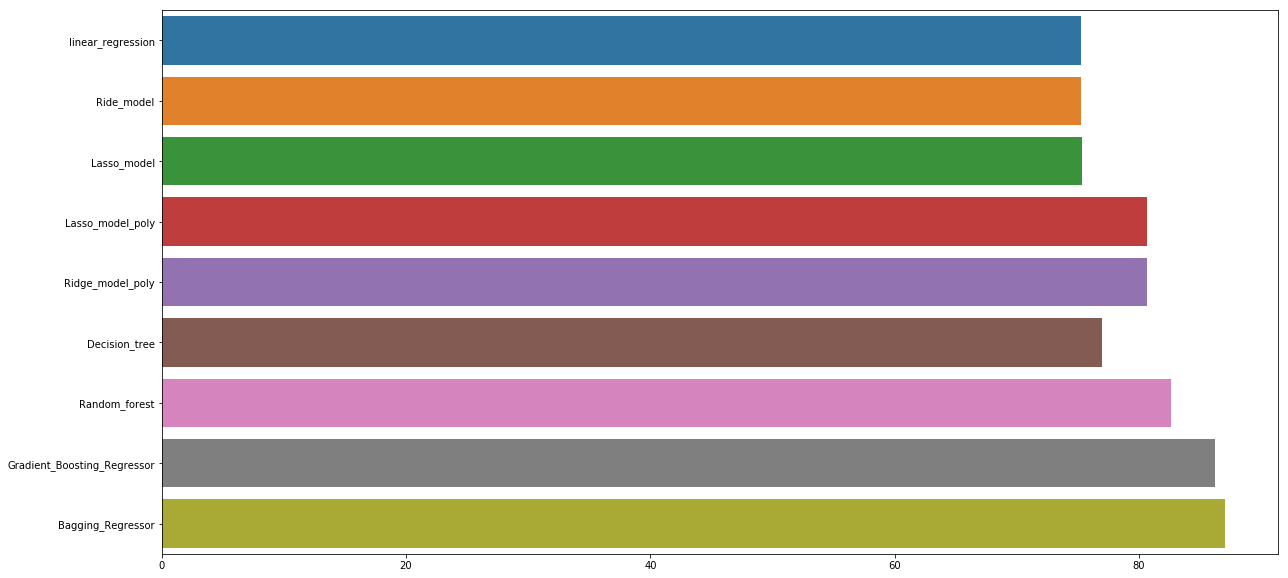

In [90]:
plt.figure(figsize=(20,10))
sns.barplot(score_list,model_names)
plt.show()

### From the all above models, GradientBoosting with Bagging Regressor gives best score and generalized model. Hence we can reject null hypothesis and accept alternate hypothesis